# Linear Regression

In [253]:
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [148]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
plt.style.available

['Solarize_Light2',
 'seaborn-bright',
 'seaborn',
 'seaborn-colorblind',
 'seaborn-paper',
 'seaborn-white',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'ggplot',
 'seaborn-darkgrid',
 'dark_background',
 'bmh',
 'seaborn-notebook',
 'classic',
 'seaborn-muted',
 'grayscale',
 'seaborn-ticks',
 'seaborn-dark',
 'seaborn-talk',
 'seaborn-poster',
 'seaborn-deep',
 'seaborn-dark-palette',
 '_classic_test',
 'fast',
 'seaborn-pastel']

### Load data

In [58]:
oecd = pd.read_csv('oecd_bli_2015.csv')
oecd.rename(columns={'Inequality':'total','INEQUALITY':'TOT'},inplace=True)
oecd = oecd.pivot_table(values='Value',columns='Indicator',index='Country')
oecd.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.100000,10.5,1.1,76.333333,13.730000,70.8,0.833333,33785.6,47657.0,...,1.130103,48134.4,92.25,2.3,84.8,512.6,14.403333,93.0,91.000000,19.300000
Austria,27.0,3.466667,7.1,1.0,83.000000,7.510000,70.2,0.400000,32778.8,49887.0,...,1.336836,43414.2,90.50,1.6,69.4,500.2,14.403333,75.8,94.333333,17.033333
Belgium,21.0,6.600000,4.5,2.0,72.000000,4.536667,60.8,1.066667,29498.0,83876.0,...,4.250667,46889.4,94.25,2.2,73.4,510.8,15.666667,89.8,86.666667,18.900000
Brazil,18.0,7.866667,4.0,6.7,44.666667,10.223333,69.2,26.000000,13954.0,6844.0,...,1.789174,16156.2,89.00,1.6,70.0,404.0,14.946667,79.6,72.333333,16.300000
Canada,15.0,1.333333,10.5,0.2,89.000000,3.926667,69.0,1.500000,31343.2,67913.0,...,1.054863,46276.4,92.50,2.5,88.2,523.8,14.243333,61.2,91.000000,17.233333


In [57]:
oecd.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [74]:
gdp = pd.read_csv('gdp_per_capita.csv',thousands=',', encoding='latin-1',na_values='nan')
gdp.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0


In [100]:
full = pd.merge(gdp,oecd,left_on='Country',right_index=True)
full.set_index('Country',inplace=True)
full.rename(columns={'2015':'gdp'},inplace=True)
full.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,gdp,Estimates Start After,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.87,2014.0,13.0,2.100000,10.5,1.1,...,1.130103,48134.4,92.25,2.3,84.8,512.6,14.403333,93.0,91.000000,19.300000
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.03,2015.0,27.0,3.466667,7.1,1.0,...,1.336836,43414.2,90.50,1.6,69.4,500.2,14.403333,75.8,94.333333,17.033333
Belgium,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.63,2014.0,21.0,6.600000,4.5,2.0,...,4.250667,46889.4,94.25,2.2,73.4,510.8,15.666667,89.8,86.666667,18.900000
Brazil,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8670.00,2014.0,18.0,7.866667,4.0,6.7,...,1.789174,16156.2,89.00,1.6,70.0,404.0,14.946667,79.6,72.333333,16.300000
Canada,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.96,2015.0,15.0,1.333333,10.5,0.2,...,1.054863,46276.4,92.50,2.5,88.2,523.8,14.243333,61.2,91.000000,17.233333


In [101]:
pd.Series(full.columns)

0                            Subject Descriptor
1                                         Units
2                                         Scale
3                 Country/Series-specific Notes
4                                           gdp
5                         Estimates Start After
6                                 Air pollution
7                                  Assault rate
8                   Consultation on rule-making
9            Dwellings without basic facilities
10                       Educational attainment
11            Employees working very long hours
12                              Employment rate
13                                Homicide rate
14     Household net adjusted disposable income
15               Household net financial wealth
16                          Housing expenditure
17                                 Job security
18                              Life expectancy
19                            Life satisfaction
20                  Long-term unemployme

In [102]:
full.index

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Russia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States'],
      dtype='object', name='Country')

### GDP vs Life Satisfaction

In [209]:
full[['gdp','Life satisfaction']]
gdp_life = full.loc[:,['gdp','Life satisfaction']]
gdp_life.head(5)

,gdp,Life satisfaction
Country,,
Australia,50961.87,7.300
Austria,43724.03,7.060
Belgium,40106.63,6.950
Brazil,8670.00,6.925
Canada,43331.96,7.280


Text(0,0.5,'satisfaction')

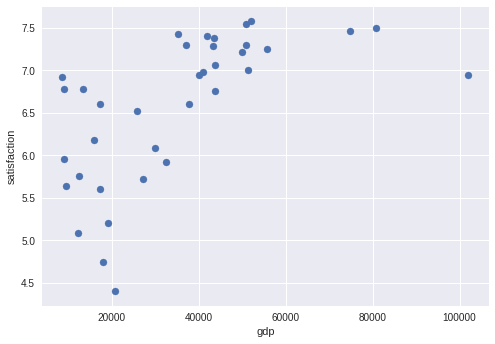

In [180]:
# Higher gdp, better life satisfaction
fig, ax = plt.subplots()
ax.scatter(gdp_life['gdp'],gdp_life['Life satisfaction'])
ax.set_xlabel('gdp')
ax.set_ylabel('satisfaction')

### Linear Regression 

In [183]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [187]:
??train_test_split

In [186]:
X = gdp_life['gdp']
y = gdp_life['Life satisfaction']

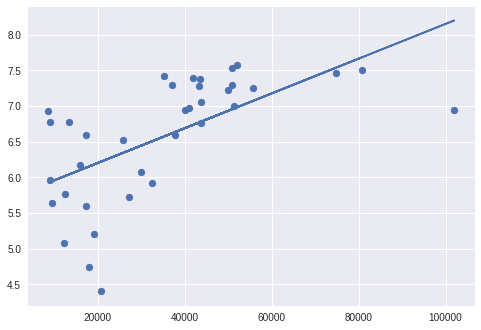

In [199]:
lin = LinearRegression()
lin.fit(X.values.reshape(-1,1),y)
y_pred = lin.predict(X.values.reshape(-1,1))

#plot 
fig, ax = plt.subplots()
ax.scatter(X,y)
ax.plot(X,y_pred)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22)
lin = LinearRegression()
lin.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [194]:
lin.score(X_test.values.reshape(-1,1),y_test)

0.16459117705752802

### Remove 3 outliers

In [201]:
gdp_life[gdp_life['gdp'] > 60000]

,gdp,Life satisfaction
Country,,
Luxembourg,101994.09,6.94
Norway,74822.11,7.46
Switzerland,80675.31,7.50


Text(0,0.5,'satisfaction')

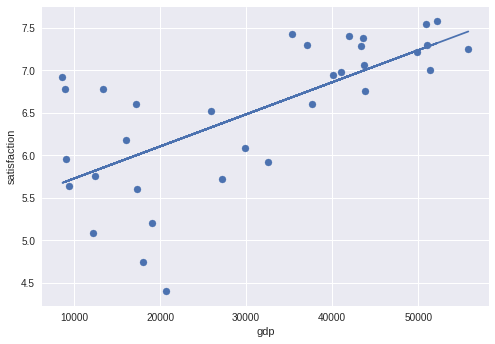

In [210]:
#drop
gdp_life.drop(index=['Luxembourg','Norway','Switzerland'], inplace=True)

X = gdp_life['gdp']
y = gdp_life['Life satisfaction']

#refit
lin = LinearRegression()
lin.fit(X.values.reshape(-1,1),y)
y_pred = lin.predict(X.values.reshape(-1,1))

#plot 
fig, ax = plt.subplots()
ax.scatter(X,y)
ax.plot(X,y_pred)
ax.set_xlabel('gdp')
ax.set_ylabel('satisfaction')

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22)
lin = LinearRegression()
lin.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [212]:
lin.score(X_test.values.reshape(-1,1),y_test)

-0.020776979385611405

# Polynomial Regression

In [213]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [218]:
# scaling to zero mean and unit variance
scal = StandardScaler()
X_scal = scal.fit_transform(X.values.reshape(-1,1))

In [248]:
# polynomial features
poly = PolynomialFeatures(degree=6)
X_pol = poly.fit_transform(X_scal)

In [249]:
# linear Reg
lin = LinearRegression()
lin.fit(X_pol,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

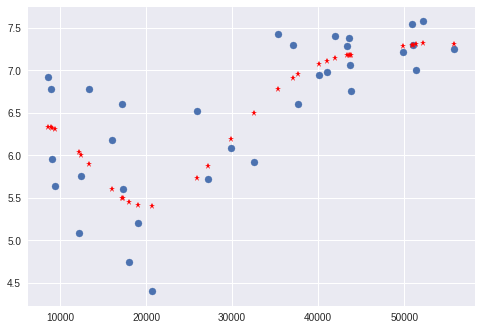

In [251]:
y_pred = lin.predict(X_pol)

fig, ax = plt.subplots()
ax.scatter(X,y)
ax.plot(X,y_pred,'r*')

### If we take a few more attributes intro consideration

In [252]:
full

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,gdp,Estimates Start After,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.87,2014.0,13.0,2.100000,10.5,1.1,...,1.130103,48134.4,92.25,2.3,84.8,512.6,14.403333,93.0,91.000000,19.300000
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.03,2015.0,27.0,3.466667,7.1,1.0,...,1.336836,43414.2,90.50,1.6,69.4,500.2,14.403333,75.8,94.333333,17.033333
Belgium,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.63,2014.0,21.0,6.600000,4.5,2.0,...,4.250667,46889.4,94.25,2.2,73.4,510.8,15.666667,89.8,86.666667,18.900000
Brazil,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8670.00,2014.0,18.0,7.866667,4.0,6.7,...,1.789174,16156.2,89.00,1.6,70.0,404.0,14.946667,79.6,72.333333,16.300000
Canada,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.96,2015.0,15.0,1.333333,10.5,0.2,...,1.054863,46276.4,92.50,2.5,88.2,523.8,14.243333,61.2,91.000000,17.233333
Chile,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.91,2014.0,46.0,6.900000,2.0,9.4,...,1.535284,20490.2,85.40,1.2,60.6,438.8,14.380000,50.2,73.000000,16.500000
Czech Republic,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.92,2015.0,16.0,2.833333,6.8,0.9,...,4.499699,19416.8,84.60,1.4,61.0,501.4,14.956667,59.0,85.000000,18.100000
Denmark,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",52114.17,2015.0,15.0,3.966667,7.0,0.9,...,1.882167,45568.0,94.75,1.9,73.2,498.8,16.060000,88.0,93.666667,19.433333
Estonia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17288.08,2014.0,9.0,5.500000,3.3,8.1,...,4.212961,18218.4,89.20,1.5,55.8,529.4,14.886667,62.8,79.000000,17.500000


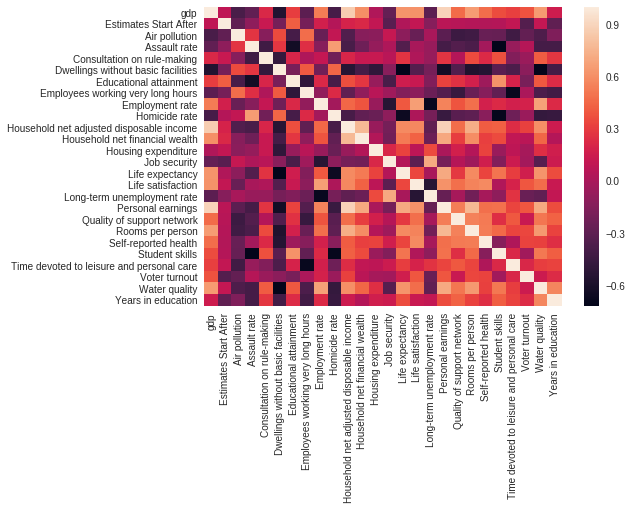

In [254]:
corr = full.corr()
sns.heatmap(corr)

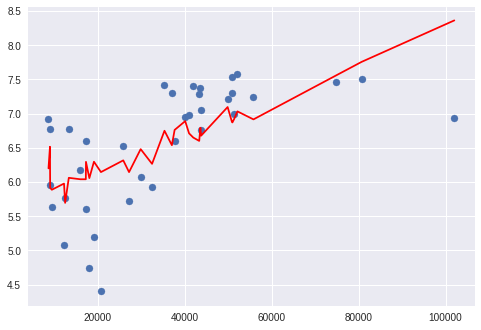

In [268]:
from sklearn.pipeline import Pipeline

new_df = full.loc[:,['gdp','Air pollution','Assault rate','Life satisfaction']]
new_df = new_df.sort_values(by='gdp',axis=0)
X = new_df.iloc[:,0:3]
y = new_df.iloc[:,3]

scal = StandardScaler()
lin = LinearRegression()

pipe = Pipeline([('scal',scal),('lin',lin)])
pipe.fit(X,y)
y_pred = pipe.predict(X)

fig, ax = plt.subplots()
ax.scatter(X['gdp'],y)
ax.plot(X['gdp'],y_pred,'r')
